In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as gos
import plotly.figure_factory as ff
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## **Resampling and Interpolation**

After completing this tutorial, you will know:
- About time series resampling, the two types of resampling, and the 2 main reasons why
you need to use them.
- How to use Pandas to upsample time series data to a higher frequency and interpolate
the new observations.
- How to use Pandas to downsample time series data to a lower frequency and summarize
the higher frequency observations.

**Resampling**

Resampling involves changing the frequency of your time series observations. Two types of resampling are:
- *Upsampling*~: Where you increase the frequency of the samples, such as **from minutes to
seconds.**
- *Downsampling*: Where you decrease the frequency of the samples, such as **from days to
months.**


In both cases, data must be invented. In the case of upsampling, care may be needed in determining how the fine-grained observations are calculated using interpolation. In the case of downsampling, care may be needed in selecting the summary statistics used to calculate the new aggregated values.


- Problem Framing: Resampling may be required if your data is not available at the same frequency that you want to make predictions.
- Feature Engineering: Resampling can also be used to provide additional structure or insight into the learning problem for supervised learning models.

There is a lot of overlap between these two cases. For example, you may have daily data and want to predict a monthly problem. You could use the daily data directly or you could downsample it to monthly data and develop your model. A feature engineering perspective may use observations and summaries of observations from both time scales and more in developing a model.

**Using the Shampoo Sales Dataset as an example**


In [6]:
def parser(x):
    return pd.datetime.strptime("190"+x, "%Y-%m")

series = pd.read_csv('monthly-shampoo-sales.csv', squeeze=True,date_parser=parser,
parse_dates=True,index_col=0,header=0)

upsampled = series.resample("D").mean()

upsampled.head(32)

Month
1901-01-01    266.0
1901-01-02      NaN
1901-01-03      NaN
1901-01-04      NaN
1901-01-05      NaN
1901-01-06      NaN
1901-01-07      NaN
1901-01-08      NaN
1901-01-09      NaN
1901-01-10      NaN
1901-01-11      NaN
1901-01-12      NaN
1901-01-13      NaN
1901-01-14      NaN
1901-01-15      NaN
1901-01-16      NaN
1901-01-17      NaN
1901-01-18      NaN
1901-01-19      NaN
1901-01-20      NaN
1901-01-21      NaN
1901-01-22      NaN
1901-01-23      NaN
1901-01-24      NaN
1901-01-25      NaN
1901-01-26      NaN
1901-01-27      NaN
1901-01-28      NaN
1901-01-29      NaN
1901-01-30      NaN
1901-01-31      NaN
1901-02-01    145.9
Freq: D, Name: Sales, dtype: float64

In [17]:
interpolated = upsampled.interpolate(method='linear')
interpolated.head(32)

Month
1901-01-01    266.000000
1901-01-02    262.125806
1901-01-03    258.251613
1901-01-04    254.377419
1901-01-05    250.503226
1901-01-06    246.629032
1901-01-07    242.754839
1901-01-08    238.880645
1901-01-09    235.006452
1901-01-10    231.132258
1901-01-11    227.258065
1901-01-12    223.383871
1901-01-13    219.509677
1901-01-14    215.635484
1901-01-15    211.761290
1901-01-16    207.887097
1901-01-17    204.012903
1901-01-18    200.138710
1901-01-19    196.264516
1901-01-20    192.390323
1901-01-21    188.516129
1901-01-22    184.641935
1901-01-23    180.767742
1901-01-24    176.893548
1901-01-25    173.019355
1901-01-26    169.145161
1901-01-27    165.270968
1901-01-28    161.396774
1901-01-29    157.522581
1901-01-30    153.648387
1901-01-31    149.774194
1901-02-01    145.900000
Freq: D, Name: Sales, dtype: float64

Text(0.5, 1.0, 'Line Plot of upsampled Shampoo Sales dataset with linear interpolation.')

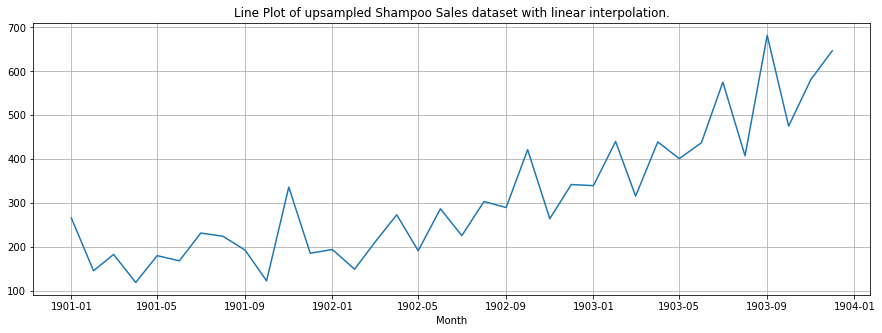

In [18]:
fig,ax = plt.subplots(figsize=(15,5))
ax = sns.lineplot(data=interpolated, x=interpolated.index,y=interpolated.values)
plt.grid(True)
plt.title("Line Plot of upsampled Shampoo Sales dataset with linear interpolation.")

In [21]:
# interpolated.plot()

In [22]:
# upsample to daily intervals with spline interpolation
interpolated_spline = upsampled.interpolate(method='spline',order=2)
interpolated_spline.head(32)

Month
1901-01-01    266.000000
1901-01-02    258.630160
1901-01-03    251.560886
1901-01-04    244.720748
1901-01-05    238.109746
1901-01-06    231.727880
1901-01-07    225.575149
1901-01-08    219.651553
1901-01-09    213.957094
1901-01-10    208.491770
1901-01-11    203.255582
1901-01-12    198.248529
1901-01-13    193.470612
1901-01-14    188.921831
1901-01-15    184.602185
1901-01-16    180.511676
1901-01-17    176.650301
1901-01-18    173.018063
1901-01-19    169.614960
1901-01-20    166.440993
1901-01-21    163.496161
1901-01-22    160.780465
1901-01-23    158.293905
1901-01-24    156.036481
1901-01-25    154.008192
1901-01-26    152.209039
1901-01-27    150.639021
1901-01-28    149.298139
1901-01-29    148.186393
1901-01-30    147.303783
1901-01-31    146.650308
1901-02-01    145.900000
Freq: D, Name: Sales, dtype: float64

Text(0.5, 1.0, 'Line Plot of upsampled Shampoo Sales dataset with spline interpolation.')

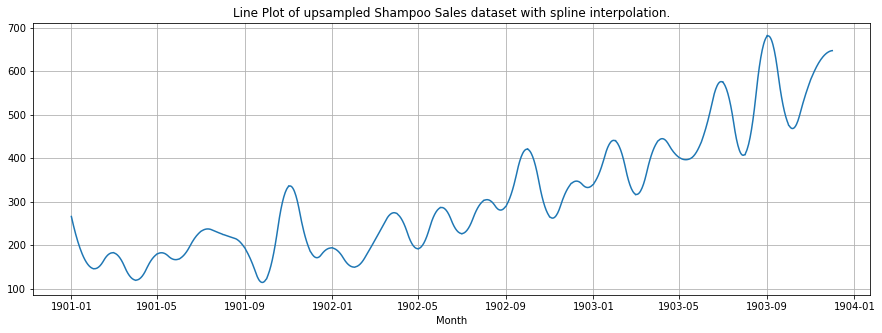

In [23]:
fig,ax = plt.subplots(figsize=(15,5))
ax = sns.lineplot(data=interpolated_spline, x=interpolated_spline.index,y=interpolated_spline.values)
plt.grid(True)
plt.title("Line Plot of upsampled Shampoo Sales dataset with spline interpolation.")

**Downsampling Data**

Pandas does have a quarter-aware alias of Q that we can use for this purpose. We must now decide how to create a new quarterly value from each group of 3 records. A good starting point is to calculate the average monthly sales numbers for the quarter.

In [26]:
# Quarterly
resample = series.resample("Q")
quarterly_mean_sales = resample.mean()
quarterly_mean_sales.head()

Month
1901-03-31    198.333333
1901-06-30    156.033333
1901-09-30    216.366667
1901-12-31    215.100000
1902-03-31    184.633333
Freq: Q-DEC, Name: Sales, dtype: float64

Text(0.5, 1.0, 'Line Plot of downsampling the Shampoo Sales dataset to quarterly mean values.')

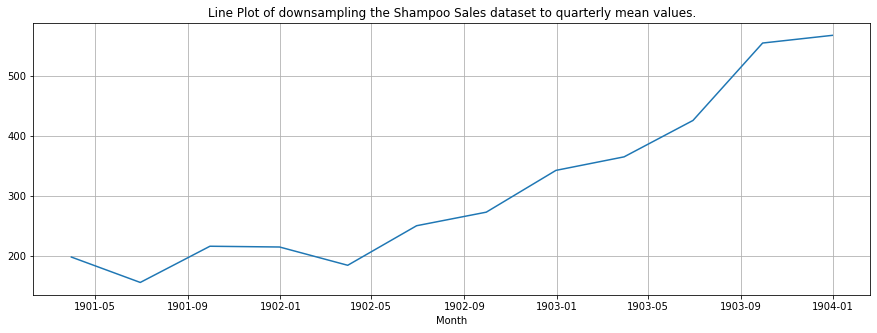

In [27]:
fig,ax = plt.subplots(figsize=(15,5))
ax = sns.lineplot(data=quarterly_mean_sales, x=quarterly_mean_sales.index,y=quarterly_mean_sales.values)
plt.grid(True)
plt.title("Line Plot of downsampling the Shampoo Sales dataset to quarterly mean values.")

In [28]:
# Yearly
resample = series.resample("A")
yearly_mean_sales = resample.sum()
yearly_mean_sales.head()

Month
1901-12-31    2357.5
1902-12-31    3153.5
1903-12-31    5742.6
Freq: A-DEC, Name: Sales, dtype: float64

Text(0.5, 1.0, 'Line Plot of downsampling the Shampoo Sales dataset to yearly sum values.')

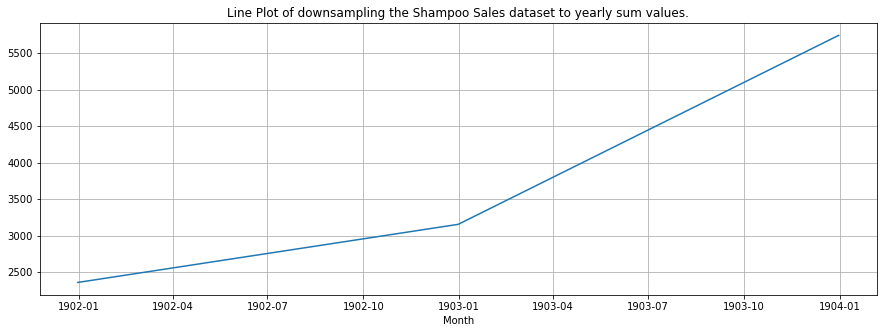

In [29]:
fig,ax = plt.subplots(figsize=(15,5))
ax = sns.lineplot(data=yearly_mean_sales, x=yearly_mean_sales.index,y=yearly_mean_sales.values)
plt.grid(True)
plt.title("Line Plot of downsampling the Shampoo Sales dataset to yearly sum values.")